In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('csv/K15T_K16_K17.csv')
df_gdp = pd.read_csv('csv/Yoy Real GDP Growth%.csv')


In [2]:
df.head()

,Gender,Type,Count (Thousands),Year,Age_Group,Occupation,Pmet_Status
0,Male,Long-term,0.286364,2014,15 - 29,Associate Professionals & Technicians,PMETs
1,Male,Short-term,1.317603,2014,15 - 29,Associate Professionals & Technicians,PMETs
2,Female,Long-term,0.000000,2014,15 - 29,Associate Professionals & Technicians,PMETs
3,Female,Short-term,1.629557,2014,15 - 29,Associate Professionals & Technicians,PMETs
4,Male,Long-term,0.182998,2014,15 - 29,Managers & Administrators (Including Working P...,PMETs


### 1. Age as a Risk Factor by Occupation

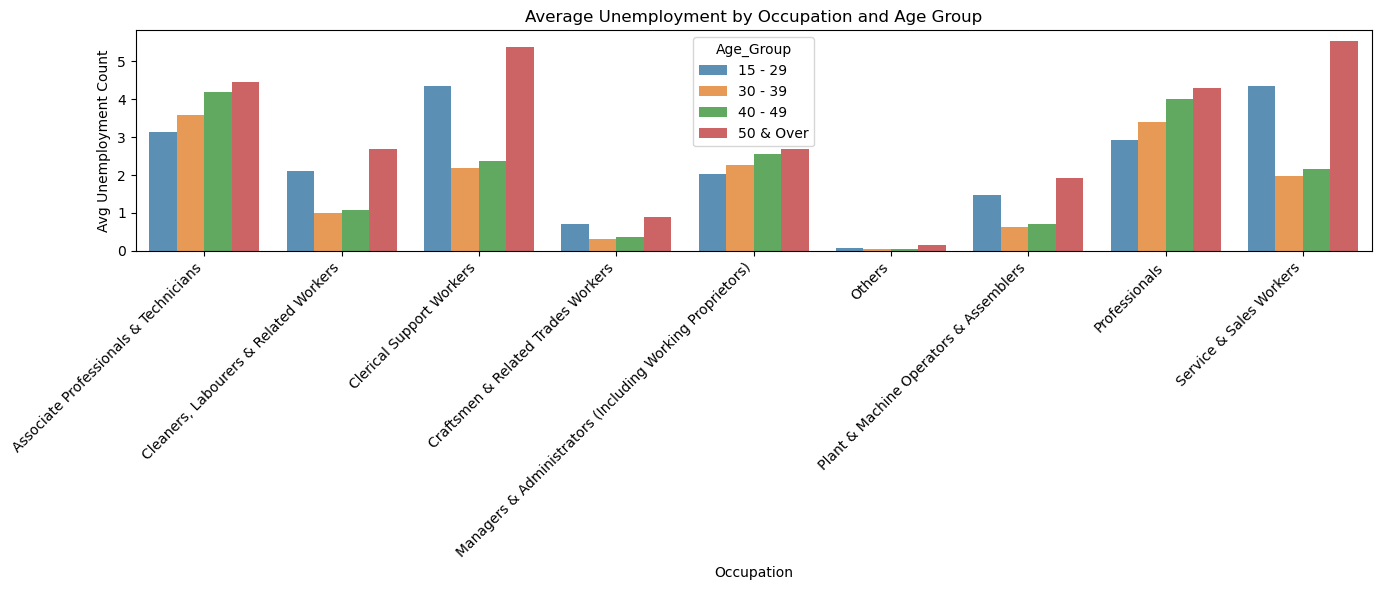

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate unemployment count by occupation and age group
age_occ = df.groupby(['Occupation', 'Age_Group', 'Year'])['Count (Thousands)'].sum().reset_index()
age_occ_avg = age_occ.groupby(['Occupation', 'Age_Group'])['Count (Thousands)'].mean().reset_index()

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=age_occ_avg, x='Occupation', y='Count (Thousands)', hue='Age_Group', alpha=0.8)
plt.xticks(rotation=45, ha='right')
plt.title('Average Unemployment by Occupation and Age Group')
plt.ylabel('Avg Unemployment Count')
plt.tight_layout()
plt.show()


### 2. Multi-Year Unemployment Trends by Occupation

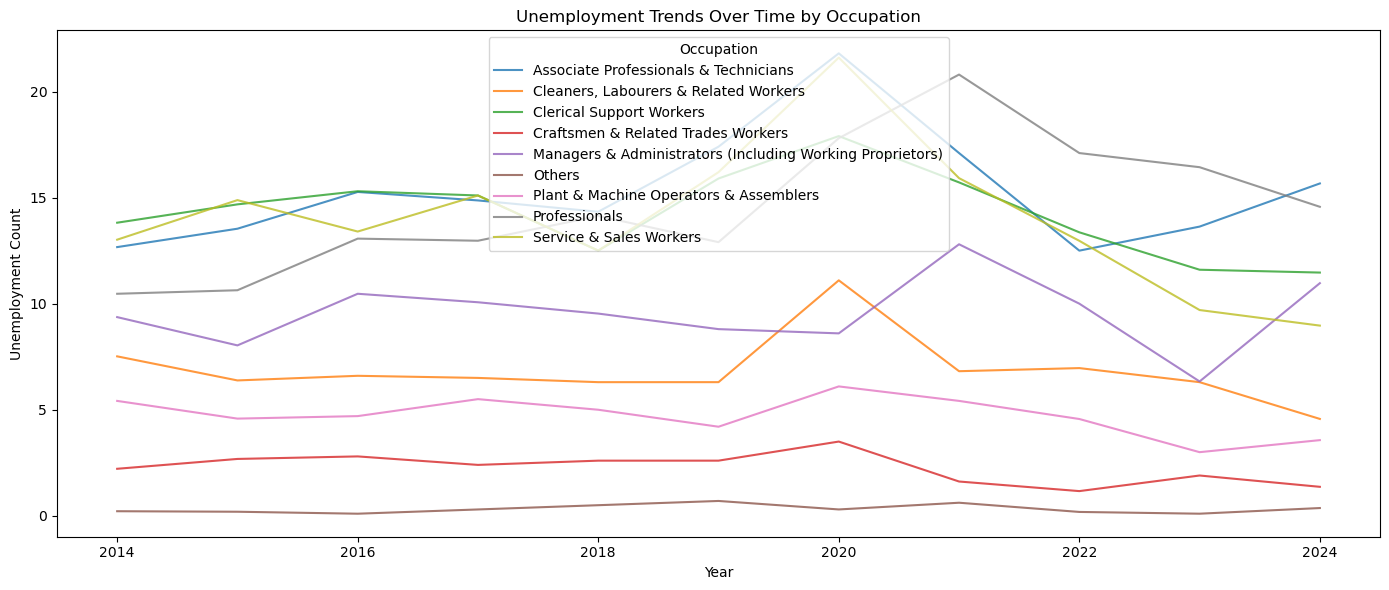

In [4]:
# Aggregate unemployment count by year and occupation
year_occ = df.groupby(['Year', 'Occupation'])['Count (Thousands)'].sum().reset_index()

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=year_occ, x='Year', y='Count (Thousands)', hue='Occupation', alpha=0.8)
plt.title('Unemployment Trends Over Time by Occupation')
plt.ylabel('Unemployment Count')
plt.tight_layout()
plt.show()


### 3. Gender Effects by Occupation (Bubble Chart)

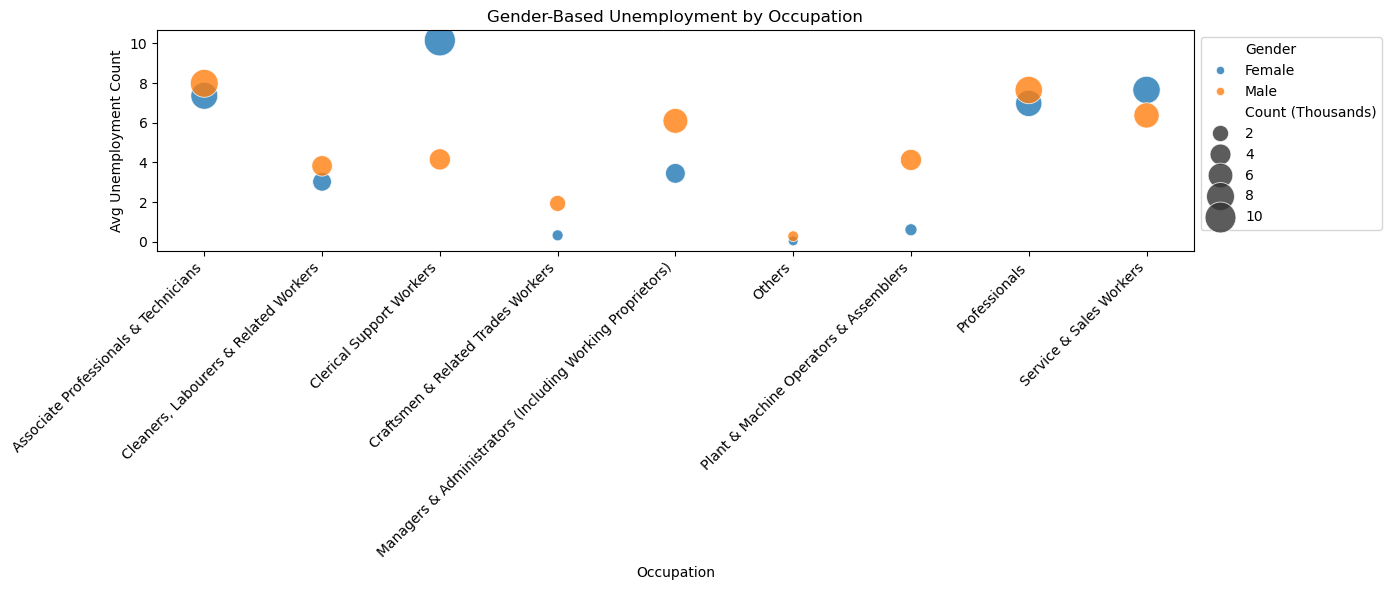

In [5]:
# Aggregate unemployment count by occupation and gender
gender_occ = df.groupby(['Occupation', 'Gender', 'Year'])['Count (Thousands)'].sum().reset_index()
gender_occ_avg = gender_occ.groupby(['Occupation', 'Gender'])['Count (Thousands)'].mean().reset_index()

# Plot
plt.figure(figsize=(14, 6))
sns.scatterplot(data=gender_occ_avg, x='Occupation', y='Count (Thousands)',
                size='Count (Thousands)', hue='Gender', sizes=(50, 500), alpha=0.8)
plt.xticks(rotation=45, ha='right')
plt.title('Gender-Based Unemployment by Occupation')
plt.ylabel('Avg Unemployment Count')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


### 4. Short-term/Long-term Effects by Occupation

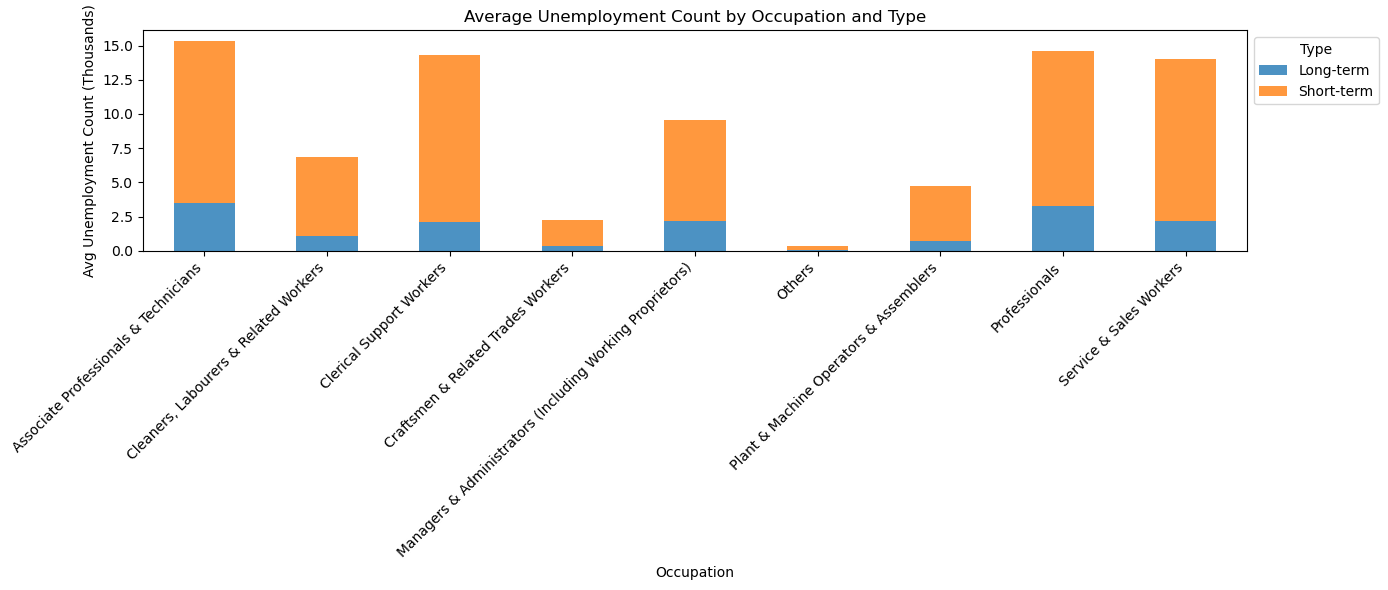

In [6]:
# Experiment (to omit in final report)
gender_occ = df.groupby(['Occupation', 'Type', 'Year'])['Count (Thousands)'].sum().reset_index()
gender_occ_avg = gender_occ.groupby(['Occupation', 'Type'])['Count (Thousands)'].mean().reset_index()
pivot_df = gender_occ_avg.pivot(index='Occupation', columns='Type', values='Count (Thousands)')

# Plot stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(14, 6), alpha=0.8)

plt.title('Average Unemployment Count by Occupation and Type')
plt.ylabel('Avg Unemployment Count (Thousands)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Type', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

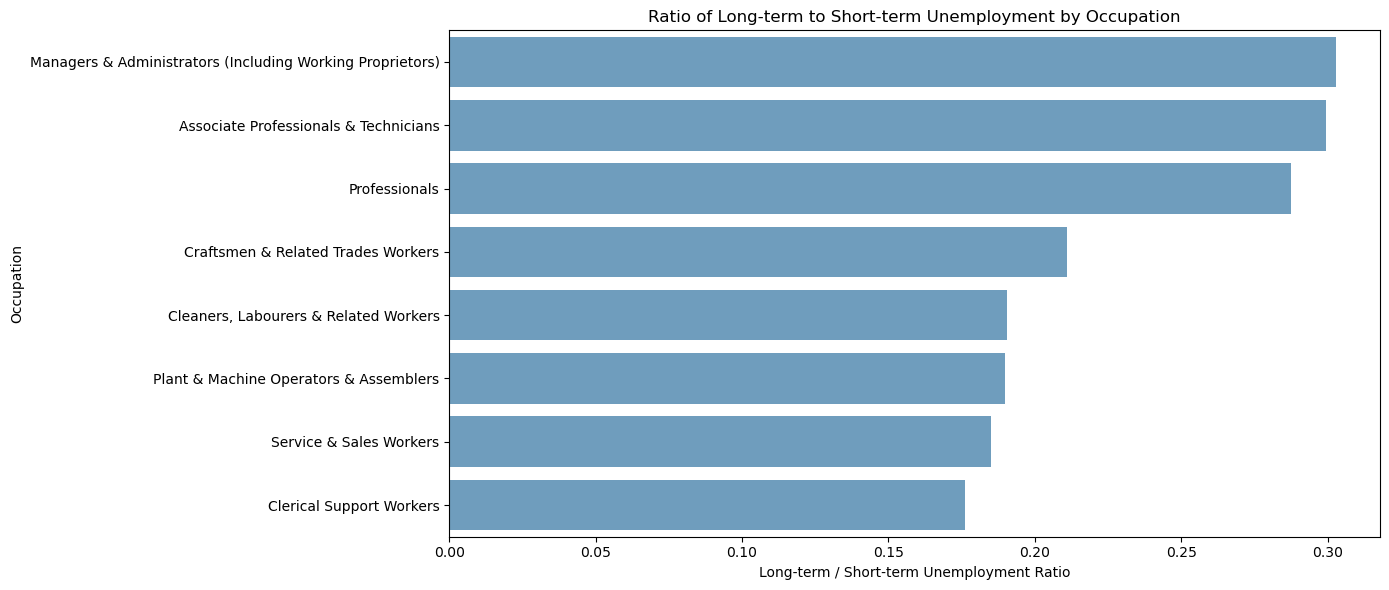

In [7]:
gender_occ = df.groupby(['Occupation', 'Type', 'Year'])['Count (Thousands)'].sum().reset_index()
gender_occ_avg = gender_occ.groupby(['Occupation', 'Type'])['Count (Thousands)'].mean().reset_index()
pivot_df = gender_occ_avg.pivot(index='Occupation', columns='Type', values='Count (Thousands)').reset_index()

# Calculate the ratio: long-term / short-term
pivot_df['Long_to_Short_Ratio'] = pivot_df['Long-term'] / pivot_df['Short-term']
pivot_df = pivot_df[pivot_df['Occupation'] != 'Others']  # dropping 'Others' from ratio plot because the absolute numbers are just very low
pivot_df.sort_values('Long_to_Short_Ratio', ascending=False, inplace=True)

# Plot the ratio
plt.figure(figsize=(14, 6))
sns.barplot(data=pivot_df, y='Occupation', x='Long_to_Short_Ratio', alpha=0.7)
plt.xlabel('Long-term / Short-term Unemployment Ratio')
plt.ylabel('Occupation')
plt.title('Ratio of Long-term to Short-term Unemployment by Occupation')
plt.tight_layout()
plt.show()


# Overarching Question  
#### How does overall and long-term unemployment vary across occupations, and what demographic and temporal patterns reveal structural vulnerabilities in the labor market?

In [8]:
'''Plot 1: Age-Based Unemployment by Occupation
Insight: This chart shows that age is not a uniform risk factor—some occupations have higher unemployment among younger workers and older groups. 
This supports your model’s quadratic age term and highlights occupation-specific age vulnerabilities.

Plot 2: Unemployment Trends Over Time by Occupation
Insight: This time series reveals that unemployment doesn’t always track GDP directly. Some occupations show increasing unemployment even in recovery years, suggesting lagged effects or structural issues. 
This validates your model’s finding that lagged GDP growth is a significant predictor and shows how economic cycles interact with occupational resilience.

Plot 3: Gender-Based Unemployment by Occupation
Insight: The bubble chart makes it clear that gender disparities are occupation-specific. 
Some roles could have penalized male unemployment more heavily, while others are more balanced. 
This visualizes the structural mismatch or bias that your model quantified, especially in roles traditionally dominated by one gender.
This as evident by the interaction terms

Plot 4: Long/Short-Term Unemployment by Occupation
Insight: The bar chart makes it clear that period of unemployment are occupation-specific. 
Some roles (such as professionals, managers & admin, Associate Professional & Technicians) could do see more people out of job for long period than others. 
This as evident by the interaction terms
'''

'Plot 1: Age-Based Unemployment by Occupation\nInsight: This chart shows that age is not a uniform risk factor—some occupations have higher unemployment among younger workers and older groups. \nThis supports your model’s quadratic age term and highlights occupation-specific age vulnerabilities.\n\nPlot 2: Unemployment Trends Over Time by Occupation\nInsight: This time series reveals that unemployment doesn’t always track GDP directly. Some occupations show increasing unemployment even in recovery years, suggesting lagged effects or structural issues. \nThis validates your model’s finding that lagged GDP growth is a significant predictor and shows how economic cycles interact with occupational resilience.\n\nPlot 3: Gender-Based Unemployment by Occupation\nInsight: The bubble chart makes it clear that gender disparities are occupation-specific. \nSome roles could have penalized male unemployment more heavily, while others are more balanced. \nThis visualizes the structural mismatch or 